# 1 - Análise da base de Dados

Vamos entender a base de dados:

Base de dados sobre preço de casas em regiões de Boston.

A base é composta por 12 atributos (colunas previsoras - variáveis independentes) e uma coluna para ser o target, sendo o preço das casas.

Abaixo segue axplicação do que cada coluna representa:

* `crim` - A taxa de crimes per capita por cidade;
* `terrenos` - A proporção de terrenos residenciais zoneados para lotes maiores que 25.000 pés quadrados (cerca de 2.322,6 metros quadrados) por cidade;
* `comercio` - A proporção de acres (cerca de 4046m²) comerciais não varejistas por cidade;
* `rio` - Variável que indica se o Rio Charles delimita ou não o imóvel em questão;
* `oxido` - Concentração de óxidos nítricos (partes por 10 milhões) na região do imóvel;
* `quartos` - Número médio de quartos na região do imóvel;
* `1940` - Proporção de imóveis contruídos antes de 1940;
* `empregos` - Distância ponderada da região para os 5 principais centros de emprego de Boston;
* `rodovias` - Índice de acessibilidade às principais rodovias da cidade;
* `imposto` - Imposto pago por cada U$10.000 do valor da propriedade;
* `educacao` - Proporção de quantidade de alunos/professores nas regiões;
* `status` - Porcentagem da população da região com status social abaixo da média americana;
* `valor` - Valor médio das casas da região

In [1]:
import pandas as pd
df = pd.read_csv('casas_boston.csv')

In [2]:
# Exibir as duas primeiras linhas do dataframe
df.head(2)

,crim,terrenos,comercio,rio,oxido,quartos,1940,empregos,rodovias,imposto,educacao,status,valor
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21600.0


In [3]:
# Quantidade de valores nulos por coluna
df.isna().sum()

crim        0
terrenos    0
comercio    0
rio         0
oxido       0
quartos     0
1940        0
empregos    0
rodovias    0
imposto     0
educacao    0
status      0
valor       0
dtype: int64

Como não temos valores nulos nas colunas, não faz sentido analisar a porcentagem de valores nulos por coluna, mas o comando seria:

In [4]:
df.isna().sum() * 100 / len(df)

crim        0.0
terrenos    0.0
comercio    0.0
rio         0.0
oxido       0.0
quartos     0.0
1940        0.0
empregos    0.0
rodovias    0.0
imposto     0.0
educacao    0.0
status      0.0
valor       0.0
dtype: float64

Aqui o mais interessante é avaliar os tipos de dados das colunas, onde, no final da análise podemos observar que temos 10 colunas do tipo float (números com casas decimais) e 3 colunas int (números inteiros)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   terrenos  506 non-null    float64
 2   comercio  506 non-null    float64
 3   rio       506 non-null    int64  
 4   oxido     506 non-null    float64
 5   quartos   506 non-null    float64
 6   1940      506 non-null    float64
 7   empregos  506 non-null    float64
 8   rodovias  506 non-null    int64  
 9   imposto   506 non-null    int64  
 10  educacao  506 non-null    float64
 11  status    506 non-null    float64
 12  valor     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Outra forma de analisar os tipos de dados das colunas seria usando o comando dtypes (abreviação de data types - Tipos de dados)

In [6]:
df.dtypes

crim        float64
terrenos    float64
comercio    float64
rio           int64
oxido       float64
quartos     float64
1940        float64
empregos    float64
rodovias      int64
imposto       int64
educacao    float64
status      float64
valor       float64
dtype: object

Nas informações descritivas da base de dados não precisamos verificar as colunas não numéricas (do tipo object) pois a base de dados não possui coluna com este tipo de dados.

In [7]:
df.describe()

,crim,terrenos,comercio,rio,oxido,quartos,1940,empregos,rodovias,imposto,educacao,status,valor
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50000.000000


Em uma base de dados com muitas colunas esta análise pode ficar meio ruim de interpretar devido à "falta de espaço" na tela. Para solucionar, podemos fazer a Matriz Transposta (inverte as linhas e colunas) da análise apenas colocando um `.T` no final do comando.

Entendendo as informações:

* `Count` - Quantos valores não nulos a coluna possuí;
* `mean` - A média dos valores da coluna (a soma de todos os valores dividida pela quantidade de valores)
* `std` - standard deviation (desvio padrão) é uma medida de dispersão que informa quão longe os valores estão da média da coluna;
* `min` - Qual o valor mínimo que aparece na coluna;
* `25%` - Qual valor que 25% dos registros são menores ou iguais;
* `50%` - Qual valor que 50% dos registros são menores ou iguais;
* `75%` - Qual valor que 75% dos registros são menores ou iguais;
* `max` - Qual o valor máximo que aparece na coluna;

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
terrenos,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
comercio,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
rio,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
oxido,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
quartos,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
1940,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
empregos,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rodovias,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
imposto,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## 1.1 - Desvio padrão

O desvio padrão é utilizado para analisar a dispersão de um conjunto de dados. Um valor alto indica que o os valores do conjunto de dados tendem a estar distantes da média, ou seja, a distribuição é mais “espalhada”. Se o valor for pequeno os dados tendem a estar mais concentrados em torno da média.


O desvio padrão é a raiz quadrada da variância, logo, precisamos calcular a variância que é a soma dos quadrados das diferenças entre cada valor e a média / número de valores

In [9]:
# Retorna quantos valores não nulos a coluna comercio possui
df[['comercio']].count()[0]

506

In [10]:
# Retorna a soma de todos os valores da coluna comercio
df[['comercio']].sum()[0]

5635.209999999999

In [11]:
# Calcular a média da coluna comercio
qtd = df[['comercio']].count()[0]
soma = df[['comercio']].sum()[0]
media = soma/qtd
media

11.13677865612648

In [12]:
# Exibe as 5 primeiras linhas da coluna comercio
df[['comercio']].head()

,comercio
0,2.31
1,7.07
2,7.07
3,2.18
4,2.18


In [13]:
# Exibe as 5 primeiras linhas da coluna comercio - 1
df[['comercio']].head()-1

,comercio
0,1.31
1,6.07
2,6.07
3,1.18
4,1.18


In [14]:
# Exibe os valors da coluna comercio menos a média da coluna comercio
df[['comercio']] - media

,comercio
0,-8.826779
1,-4.066779
2,-4.066779
3,-8.956779
4,-8.956779
...,...
501,0.793221
502,0.793221
503,0.793221
504,0.793221


In [15]:
# Exibe os valors da coluna comercio menos a média da coluna comercio, tudo isto elevado ao quadrado
(df[['comercio']] - media) ** 2

,comercio
0,77.912021
1,16.538689
2,16.538689
3,80.223884
4,80.223884
...,...
501,0.629200
502,0.629200
503,0.629200
504,0.629200


In [16]:
# a soma de: ((os valors da coluna comercio menos a média da coluna comercio) elevado ao quadrado)
((df[['comercio']] - media) ** 2).sum()[0]

23767.543449209486

In [17]:
# O cálculo anterior dividido pela quantidade de registros não nulos
variancia = (((df[['comercio']] - media) ** 2).sum() / qtd)[0]
variancia

46.97142974152072

Para calcular a raiz quadrada no python podemos elevar o valor a 0.5

In [18]:
variancia ** 0.5

6.853570583390874

Agora que temos a teoria do desvio padrão, podemos utilizar o numpy para calcular isto:

In [19]:
import numpy as np
desvio_padrao = np.std(df[['comercio']].values)
desvio_padrao

6.853570583390874

### 1.1.1 - Gráfico de Desvio padrão

In [20]:
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Calcula a média dos valores da lista (Coluna)
def media(lista):
    # Número de itens na lista
    n = len(lista)
    # Média dos dados da lista
    mean = sum(lista) / n
    return mean

# Calcula a variância dos valores da lista (Coluna)
def variancia(lista):
    # Número de itens na lista
    n = len(lista)
    #Recebe a média da lista
    mean = media(lista)
    # Desvios quadrados
    desvio = [(x - mean) ** 2 for x in lista]
    # Variância
    variancia = sum(desvio) / n
    return variancia

# Calcula o desvio padrão da lista (Coluna)
def desv_pad(lista):
    # Recebe a variância dos valores da lista
    var = variancia(lista)
    # Calcula o desvio padrão
    desv_padrao = math.sqrt(var)
    return desv_padrao


# Calcula Função densidade de probabilidade (PDF - Probability Density Function) da lista (Coluna)
def dens_prob(lista):
    pdf = stats.norm.pdf(lista, media(lista), desv_pad(lista))
    return pdf

# Lista que irá receber os valores de todas as colunas (x_values) (Cada posição na lista é uma outra lista com os valores ordenados de uma coluna)
x_val = []
# Lista que irá receber a Função densidade de probabilidade de todas as colunas
pdf_val = []
# Lista que irá receber o nome do gráfico
graph_name = []

# Loop que irá percorrer o nome das colunas do dataframe
for x in df.columns:
        # Recebe os valores não nulos da coluna
        x_values = list(df[x].dropna())
        # Ordena os valores em ordem crescente
        x_values.sort()
        # Salva os valores de x_value na lista x_val
        x_val.append(x_values)

        # Salva os valores da Função densidade de probabilidade na lista pdf_val
        pdf_val.append(dens_prob(x_values))

        # Salva o nome do gráfico na lista graph_name
        graph_name.append('Desvio Padrão de '+ x)

def grafico_desvio_padrao(x_val, pdf_val, graph_name, posicao):
    # Define o tamanho da gráfico
    plt.figure(figsize=(20,10))

    # Define o estilo do gráfico
    plt.style.use('seaborn-whitegrid')


    # Define o gráfico
    plt.plot(x_val[posicao], pdf_val[posicao])
    # Define o nome do gráfico
    plt.title(graph_name[posicao],size = 20)


    # Define o nome do eixo x
    plt.xlabel('Valor',size = 20)
    # Define o nome do eixo y
    plt.ylabel('Quantidade',size = 20)

    # Define o tamanho dos valores no eixo x
    plt.xticks(size = 20)
    # Define o tamanho dos valores no eixo y
    plt.yticks(size = 20)

    # Recebe o valor de x no ponto y máximo
    xmax = x_val[posicao][np.argmax(pdf_val[posicao])]
    # Recebe o maior valor de y
    ymax = pdf_val[posicao].max()


    # Define a linha horizontal cortando o ponto y máximo
    plt.axhline(ymax, ls=':', c='k')
    # Define a linha vertical cortando o ponto y máximo
    plt.axvline(xmax, ls=':', c='k')


    # Plota os valores de x e y no ponto y máximo
    plt.text(xmax*1.003, ymax*1.015, f'({round(xmax,4)}, {round(ymax)})')


    # Define o ponto verde no y máximo
    plt.plot(xmax,ymax,'s', color = 'g')

    # Define o tamanho da fonte
    plt.rcParams['font.size'] = '15'

    # Para salvar a figura, descomente a linha abaixo -------------------------
    #plt.savefig('fig.png')

    plt.show()
    %matplotlib inline

<ipython-input-20-41ae76e999bb>:69: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


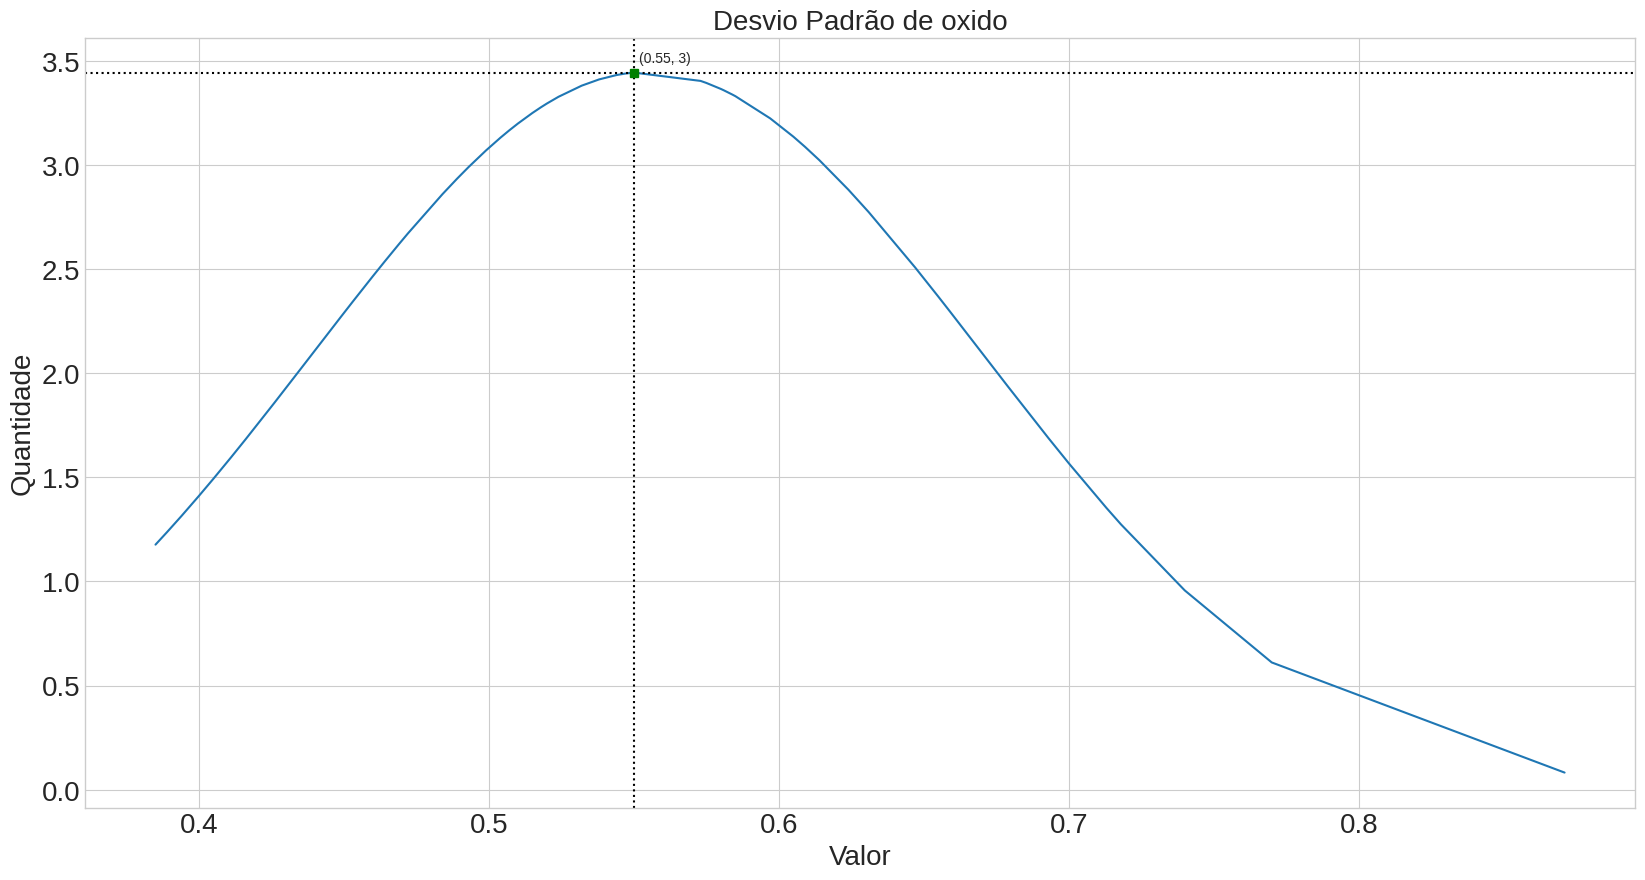

In [21]:
grafico_desvio_padrao(x_val, pdf_val, graph_name, 4)

<ipython-input-20-41ae76e999bb>:69: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


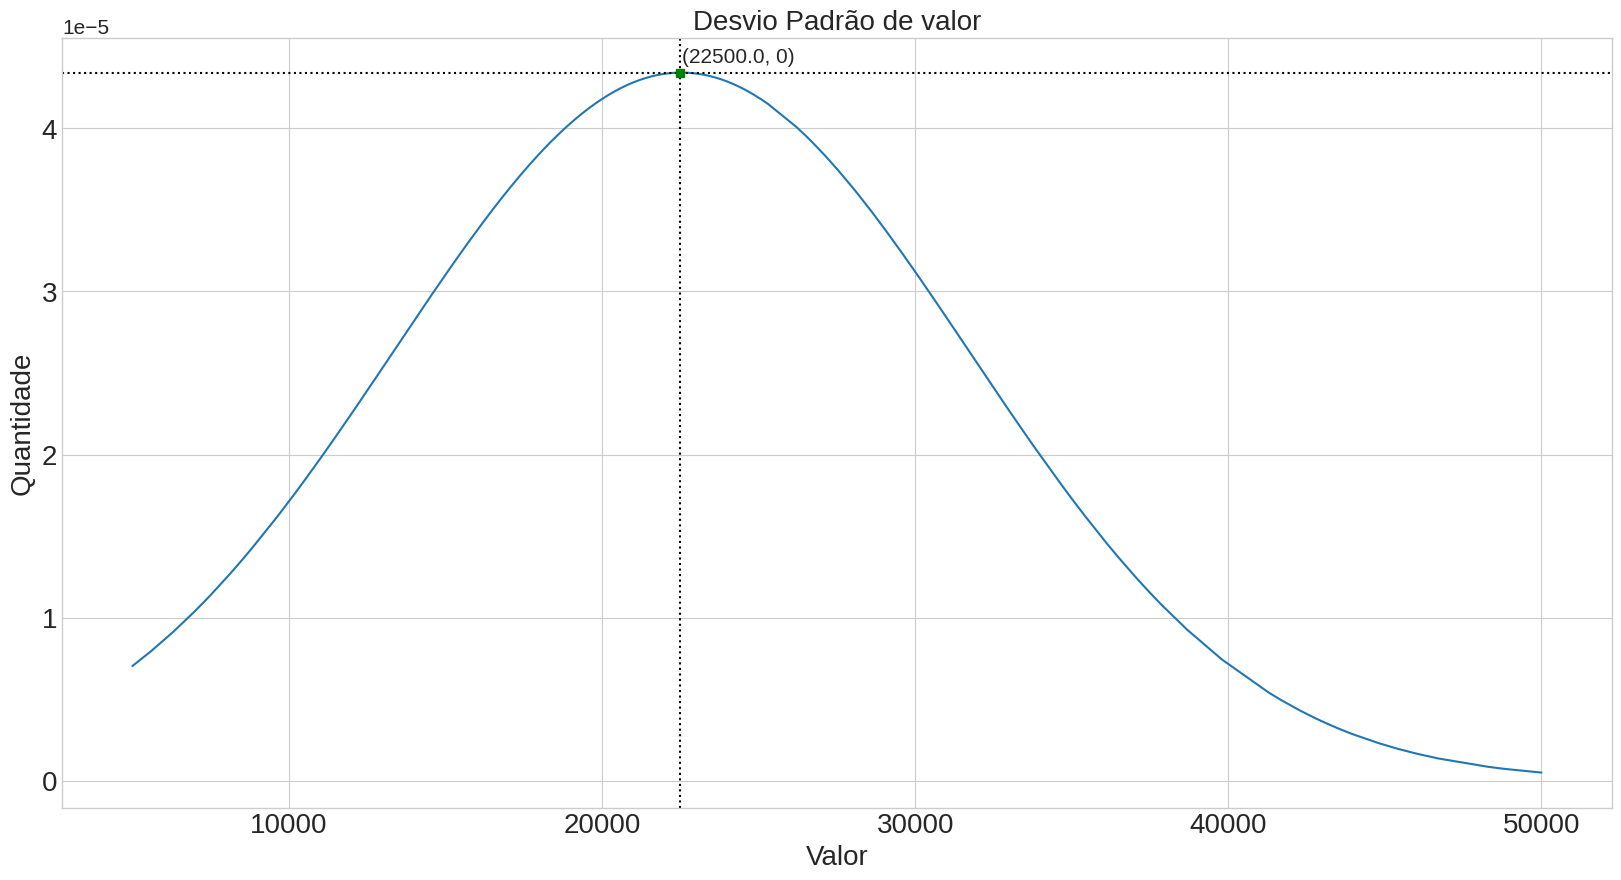

In [22]:
grafico_desvio_padrao(x_val, pdf_val, graph_name, 12)

# 2 - Algorítmos de Mineração de Dados

Como já vimos anteriormente, a Mineração de Dados nus ajuda a extrair informações valiosos em conjuntos de dados. Existem vários algoritmos de mineração de dados disponíveis dos quais temos que selecionar o(s) mais adequados para cada base de dados e problema que queremos solucionar.



## 2.1 - Regressão Linear:
A regressão linear é um algoritmo de aprendizado supervisionado que tenta modelar a relação entre uma variável dependente (nosso target) contínua (valores numéricos como valor, peso, comprimento, tempo, área...) e uma ou mais variáveis independentes.

Como a regressão linear é um algoritmo supervisionado (que sabemos qual classe queremos prever), precisamos realizar os seguintes passos antes de aplicar os dados no algoritmo:
* 1 - Separar os dados em X e y, sendo X o valor das colunas idependentes e y a nossa variável independente (o target, alvo que desejamos prever)
* 2 - Normalizar os dados de X e y
* 3 - Separar X e y em treinamento e teste

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

### 2.1.1 - Separar dados em X e y

In [24]:
df = pd.read_csv('casas_boston.csv')

In [25]:
# Retorno uma lista com as colunas da base de dados
df.columns

Index(['crim', 'terrenos', 'comercio', 'rio', 'oxido', 'quartos', '1940',
       'empregos', 'rodovias', 'imposto', 'educacao', 'status', 'valor'],
      dtype='object')

In [26]:
# Retorno uma lista com as colunas da base de dados sem a última coluna
df.columns[:-1]

Index(['crim', 'terrenos', 'comercio', 'rio', 'oxido', 'quartos', '1940',
       'empregos', 'rodovias', 'imposto', 'educacao', 'status'],
      dtype='object')

In [27]:
X = df[df.columns[:-1]]

# Exibe a base de dados sem a última coluna
X

,crim,terrenos,comercio,rio,oxido,quartos,1940,empregos,rodovias,imposto,educacao,status
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [28]:
y = df[['valor']]

# Exibe a base de dados sem a última coluna
y

,valor
0,24000.0
1,21600.0
2,34700.0
3,33400.0
4,36200.0
...,...
501,22400.0
502,20600.0
503,23900.0
504,22000.0


### 2.1.2 - Normalizar os dados

In [29]:
# Cria uma instância do MinMaxScaler para normalizar as features (atributos, variáveis independentes)
scaler_features =  MinMaxScaler()

# Define quais oa valores o scaler_features irá utilizar para normalizar cada coluna
scaler_features.fit(X)

# Normaliza os dados de X
X = scaler_features.transform(X)

In [30]:
# Cria uma instância do MinMaxScaler para normalizar o nosso alvo (target, variáveis dependente)
scaler_target =  MinMaxScaler()

# Define quais oa valores o scaler_target irá utilizar para normalizar a coluna
scaler_target.fit(y)

# Normaliza os dados de y
y = scaler_target.transform(y)

Repare que antes da normalização estávamos utilizando dataframes em X e y, após normalizar o próprio MinMaxScaler do Sklearn já converte os valores para uma matriz numpy

In [31]:
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.08015267e-01, 2.87234043e-01, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.04961832e-01, 5.53191489e-01, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.04961832e-01, 5.53191489e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.64122137e-01, 8.93617021e-01, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        1.64122137e-01, 8.93617021e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.64122137e-01, 8.93617021e-01, 1.69701987e-01]])

In [32]:
y

array([[0.42222222],
       [0.36888889],
       [0.66      ],
       [0.63111111],
       [0.69333333],
       [0.52666667],
       [0.39777778],
       [0.49111111],
       [0.25555556],
       [0.30888889],
       [0.22222222],
       [0.30888889],
       [0.37111111],
       [0.34222222],
       [0.29333333],
       [0.33111111],
       [0.40222222],
       [0.27777778],
       [0.33777778],
       [0.29333333],
       [0.19111111],
       [0.32444444],
       [0.22666667],
       [0.21111111],
       [0.23555556],
       [0.19777778],
       [0.25777778],
       [0.21777778],
       [0.29777778],
       [0.35555556],
       [0.17111111],
       [0.21111111],
       [0.18222222],
       [0.18      ],
       [0.18888889],
       [0.30888889],
       [0.33333333],
       [0.35555556],
       [0.43777778],
       [0.57333333],
       [0.66444444],
       [0.48      ],
       [0.45111111],
       [0.43777778],
       [0.36      ],
       [0.31777778],
       [0.33333333],
       [0.257

### 2.1.3 - Separar os dados em treinamento e teste

In [33]:
# Dividir o conjunto de dados em dados de treinamento e teste, com 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.1.4 - Treinar o modelo de Regressão Linear

In [34]:
# Criar uma instância do modelo de regressão linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### 2.1.5 - testar/avaliar o modelo treinado

In [35]:
# Avaliar o desempenho do modelo nos dados de teste
predict = model_lr.predict(X_test)

Como é uma regressão linear, não temos como calcular a acurácia (A acurácia mede porcentagem de acertos quando queremos prever uma classe) pois não temos uma classe (por exemplo a base de dados de roupas que tinham as classes bota, blusa, camiseta, vestido...)

Então uma métrica para utilizar é o MSE de Mean Square Error ou Erro Médio Quadrático, que verifica quanto ele está errando em relação aos valores reais. Quanto menor o valor, melhor o modelo.

Outra forma de avaliar o resultado de uma regressão linear, é utilizando um gráfico para comparar os valores reais e os valores preditos.

Mas, antes de fazermos estas análises, é importante "desnormalizar" os dados de y e os dados que o modelo previu. Para isto iremos usar o próprio scaler_target com a função inverse_transform.


`Plot Twist` - Vamos treinar um algoritmo de rede neural e comparar com os resultados do algoritmo de regressão linear

In [36]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [37]:
X_train.shape[1]

12

In [38]:
# Criamos uma instância do modelo de rede neural
model_rn = Sequential()
model_rn.add(InputLayer(input_shape=(X_train.shape[1],)))
model_rn.add(Dense(50, activation='relu'))
model_rn.add(Dense(50, activation='relu'))
model_rn.add(Dense(50, activation='relu'))
model_rn.add(Dense(50, activation='relu'))
model_rn.add(Dense(50, activation='relu'))
model_rn.add(Dense(1, activation='linear'))

# compila o modelo
model_rn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# treina o modelo
model_rn.fit(X_train, y_train, epochs=200, batch_size=10, verbose = 0)

predict_rn = model_rn.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [39]:
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scaler_target.inverse_transform(y_test)
# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_target.inverse_transform(predict)
# Desnormaliza o predict na variável predict_desnormalizado
predict_rn_desnormalizado = scaler_target.inverse_transform(predict_rn)

# Calcula o mse com a biblioteca do sklearn
mse = mean_squared_error(y_test_desnormalizado, predict_desnormalizado)
print("Mean squared error Regressão Linear: ", mse)

mse_rn = mean_squared_error(y_test_desnormalizado, predict_rn_desnormalizado)
print("Mean squared error Rede Neural: ", mse_rn)

Mean squared error Regressão Linear:  22777708.563866086
Mean squared error Rede Neural:  9242904.367606156


In [40]:
# Exibe o erro médio quadrático do y_test e predict sem a desnormalização
mse = mean_squared_error(y_test, predict)
print("Mean squared error: ", mse)

Mean squared error:  0.011248251142649917


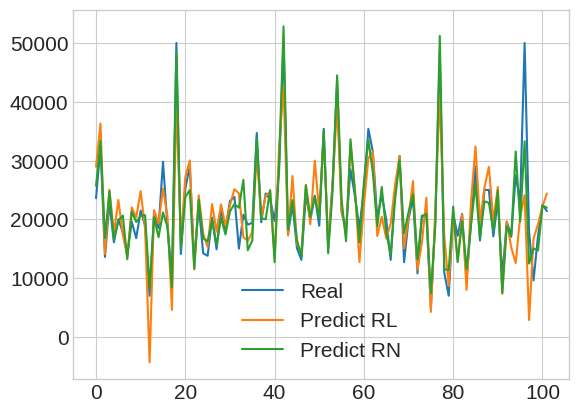

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(y_test_desnormalizado)), y_test_desnormalizado, label = 'Real')
plt.plot(range(0,len(predict_desnormalizado)), predict_desnormalizado, label = 'Predict RL')
plt.plot(range(0,len(predict_rn_desnormalizado)), predict_rn_desnormalizado, label = 'Predict RN')
plt.legend()
plt.show()

Repare que desta forma pode ter ficado um pouco ruim de visualizar o real com o valor predito. Para melhorar esta vizualização, podemos criar um dataframe com o valor real e o valor predito e ordenar os valores reais de forma crescente.

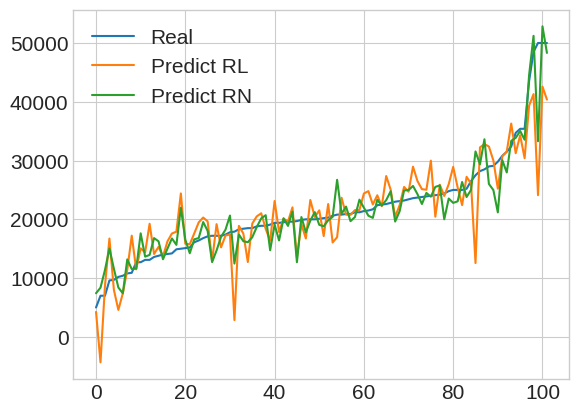

In [42]:
# Cria um dataframe para ordenar os valores
df_grafico_predict = pd.DataFrame()

# Acrescenta o valor de y_test_desnormalizado na coluna real
df_grafico_predict['real'] = y_test_desnormalizado.flatten()

# Acrescenta o valor de predict_desnormalizado na coluna predict
df_grafico_predict['predict_rl'] = predict_desnormalizado.flatten()

# Acrescenta o valor de predict_desnormalizado na coluna predict
df_grafico_predict['predict_rn'] = predict_rn_desnormalizado.flatten()

# Ordena os dados pela coluna real de forma crescente
df_grafico_predict.sort_values(by='real', inplace = True)

plt.plot(range(0,len(y_test_desnormalizado)), df_grafico_predict['real'], label = 'Real')
plt.plot(range(0,len(predict_desnormalizado)), df_grafico_predict['predict_rl'], label = 'Predict RL')
plt.plot(range(0,len(predict_desnormalizado)), df_grafico_predict['predict_rn'], label = 'Predict RN')
plt.legend()
plt.show()

## 2.2 - Ávore de Decisão e Floresta Aleatória

A árvore de decisão é um algoritmo de aprendizado supervisionado que cria um modelo de decisão em forma de árvore. Cada nó interno da árvore representa uma decisão baseada em um valor de atributo, e cada folha representa o valor de saída ou a decisão final.

Podemos pensar na Floresta aleatória como um conjuntos de ávores com diferentes características.

Tando a ávore como a floresta são algoritmos que determinam uma classe. Então, diferente do exemplo que vimos, estes algoritmos não conseguiriam prever os valores das casas. Para seguirmos com a mesma base de dados, podemos classificar os valores em faixa de valores da seguinte forma:

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('casas_boston.csv')
df.head()

,crim,terrenos,comercio,rio,oxido,quartos,1940,empregos,rodovias,imposto,educacao,status,valor
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36200.0


In [44]:
df.valor.describe()

count      506.000000
mean     22532.806324
std       9197.104087
min       5000.000000
25%      17025.000000
50%      21200.000000
75%      25000.000000
max      50000.000000
Name: valor, dtype: float64

Podemos ver que o valor mínimo dos preçõs é 5000 e o máximo 50.000.

Sendo assim, que tal dividir os valores em 10 classes, sendo:

1 = casas com valores de U$5.000 a valores menores que U$10.000

2 = casas com valores de U$10.000 a valores menores que U$20.000

3 = casas com valores de U$20.000 a valores menores que U$30.000

4 = casas com valores de U$30.000 a valores menores que U$40.000

5 = casas com valores a partir de U$40.000

In [45]:
# Acrescenta as categorias de cada valor
df.loc[(df['valor']>=5000) & (df['valor']<10000), 'categoria_valor'] = 0
df.loc[(df['valor']>=10000) & (df['valor']<20000), 'categoria_valor'] = 1
df.loc[(df['valor']>=20000) & (df['valor']<30000), 'categoria_valor'] = 2
df.loc[(df['valor']>=30000) & (df['valor']<40000), 'categoria_valor'] = 3
df.loc[df['valor']>=40000, 'categoria_valor'] = 4

# Remove a coluna valor
df.drop('valor', axis = 1, inplace = True)

In [46]:
df.categoria_valor.value_counts()

categoria_valor
2.0    212
1.0    186
3.0     53
4.0     31
0.0     24
Name: count, dtype: int64

In [47]:
df.head()

,crim,terrenos,comercio,rio,oxido,quartos,1940,empregos,rodovias,imposto,educacao,status,categoria_valor
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,2.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,2.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,3.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,3.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,3.0


### 2.2.1 - Tratar dados para aplicar ao modelo.

In [48]:
X = df[df.columns[:-1]]
y = df[['categoria_valor']].values.flatten()

# Cria uma instância do MinMaxScaler para normalizar as features (atributos, variáveis independentes)
scaler_features =  MinMaxScaler()

# Define quais oa valores o scaler_features irá utilizar para normalizar cada coluna
scaler_features.fit(X)

# Normaliza os dados de X
X = scaler_features.transform(X)

# Dividir o conjunto de dados em dados de treinamento e teste, com 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

Quando utilizamos uma classificação, geralmente não normalizamos o alvo.

Acurácia Árvore de Decisão:  0.7941176470588235


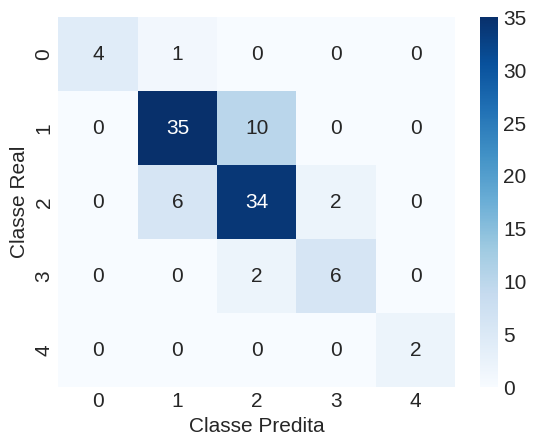

In [49]:
# Árvore de decisão
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("Acurácia Árvore de Decisão: ", acc_dtc)

cm = confusion_matrix(y_test, y_pred_dtc)
# Exibindo a matriz de confusão em forma de gráfico
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

Acurácia Floresta Aleatória:  0.7941176470588235


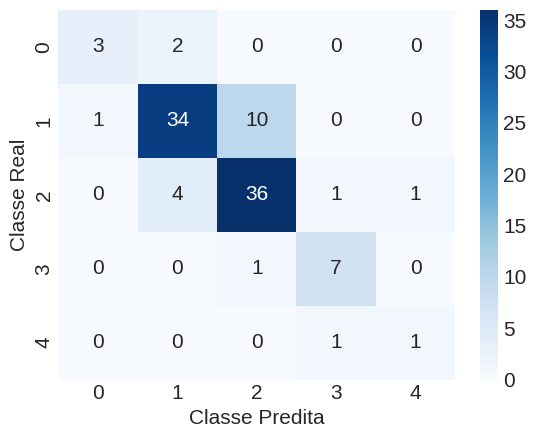

In [50]:
# Floresta aleatória
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print("Acurácia Floresta Aleatória: ", acc_rfc)

cm = confusion_matrix(y_test, y_pred_rfc)
# Exibindo a matriz de confusão em forma de gráfico
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

In [51]:
df[['categoria_valor']].nunique()[0]

5

In [52]:
# Criamos uma instância do modelo de rede neural
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
# O que iremos alterar é a função de ativação e quantos neurônios na camada de saída
model.add(Dense(df[['categoria_valor']].nunique()[0], activation='softmax'))

# compila o modelo, também alteramos o loss para categórico
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# treina o modelo
model.fit(X_train, pd.get_dummies(y_train), epochs=200, batch_size=10, verbose = 0)

y_pred_rn = model.predict(X_test)

_, acc_nn = model.evaluate(X_test, pd.get_dummies(y_test), verbose=0)
print("Acurácia Rede Neural: ", acc_nn)

4/4 [==============================] - 0s 3ms/step
Acurácia Rede Neural:  0.7745097875595093


Entendendo a função de ativação SoftMax:

Esta função de ativação retorna uma lista para cada previsão.

Esta lista é composta pela quantidade de classes que existem, no caso, temos 5 classes, então será retornado 1 lista com 5 valores onde cada valor representa a porcentagem de chance dos valores de X (atributos) pertencerem a cada classe. A soma dos 5 valores é 1.

Exemplo de como é o resultado do predict:

[0.001, 0.022, 0.957, 0.01, 0.01]

onde cada posição na lista, representa, respectivamente, a seguinte categoria:

[1, 2, 3, 4 , 5]

In [53]:
0.001 + 0.022 + 0.957 + 0.01 + 0.01

1.0

In [54]:
y_pred_rn

array([[7.87680976e-10, 1.48433313e-01, 8.51566672e-01, 2.61257749e-09,
        7.99806749e-12],
       [3.69577939e-19, 2.33923032e-07, 9.99999702e-01, 1.71359051e-08,
        1.61206129e-12],
       [6.52861137e-30, 1.00791164e-17, 1.85225304e-06, 9.69037592e-01,
        3.09604742e-02],
       [6.23842999e-02, 9.17310596e-01, 2.03018375e-02, 1.52504555e-07,
        3.12825478e-06],
       [3.83165400e-07, 9.68235791e-01, 3.17638926e-02, 1.36801306e-10,
        1.96163349e-10],
       [3.59097749e-06, 9.58855748e-01, 4.11407463e-02, 1.95304182e-08,
        2.81359647e-09],
       [2.13582929e-08, 2.43306179e-02, 9.75547850e-01, 1.24282260e-05,
        1.09074601e-04],
       [5.29312108e-13, 2.62532471e-04, 9.99737263e-01, 2.27007419e-07,
        1.49679352e-10],
       [1.33281731e-07, 9.99575078e-01, 4.24840633e-04, 1.51643197e-13,
        4.91635914e-14],
       [6.87042542e-04, 9.22762692e-01, 7.65498281e-02, 7.36255075e-08,
        1.91864530e-07],
       [9.33622941e-03, 9.6763

In [55]:
# Com este comando, obtemos qual a categoria que possui maior porcentagem para cada previsão
y_pred_rn = np.argmax(y_pred_rn,axis=1)
y_pred_rn

array([2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 3, 3, 1, 1, 2, 4, 1, 1, 2, 1, 2, 1, 2, 2, 4, 1, 1,
       2, 2, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 4, 2, 1, 2, 2, 2, 1, 2, 2])

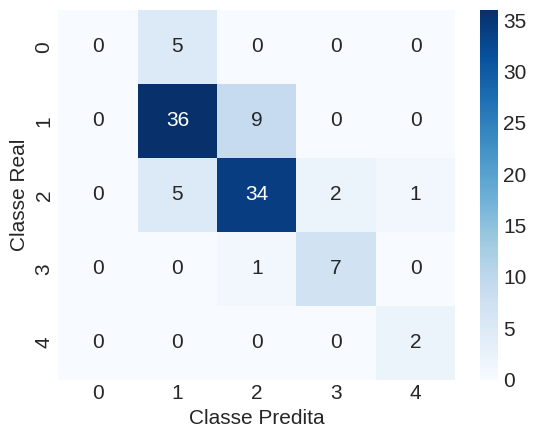

In [56]:
cm = confusion_matrix(y_test, y_pred_rn)
# Exibindo a matriz de confusão em forma de gráfico
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

## 2.3 - Clusterização com kmeans

O K-Means é um algoritmo de agrupamento que agrupa dados em K grupos diferentes. O algoritmo tenta minimizar a distância entre os pontos de dados em cada grupo e o centro do grupo.

Este algoritmo é não supervisionado, ou seja, não sabemos o que queremos prever (não temos a classe algo no final da tabela...)

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from IPython.display import clear_output

df = pd.read_csv('casas_boston.csv')

X = df[df.columns[:-1]].values

Ao utilizar a mesma base de dados, não devemos utilizar a classe alvo (o nosso y). Iremos utilizar apenas os atributos (classes previsoras ou features).

Em geral, a decisão de normalizar ou não os dados antes da clusterização dependerá das características dos dados em questão e dos objetivos específicos da análise. Em certas situações, a normalização pode não ser necessária ou até mesmo prejudicar a análise. Por exemplo, se as variáveis ​​já estiverem na mesma escala ou se você quiser que a clusterização seja influenciada por variáveis ​​com valores maiores, é possível que a normalização não seja necessária.

Aqui não irei normalizar os dados, visando encontrar grupos mais relacionados às variáveis com maires valores (terreno, 1940 e imposto)

### 2.3.1 - Definir quantidade de clusters

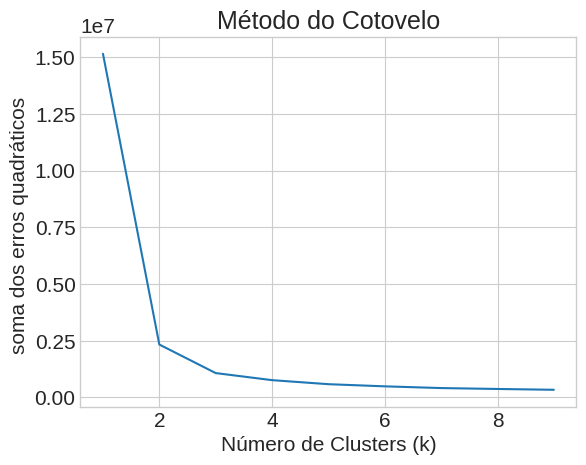

In [58]:
# Defina o intervalo de valores k
k_range = range(1, 10)

# Execute o algoritmo de clustering para cada valor k e armazene a soma dos erros quadráticos em uma lista
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
# Limpa as mensagens de saída
clear_output(wait=True)

# Trace a curva de cotovelo
plt.plot(k_range, sse)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('soma dos erros quadráticos ')
plt.title('Método do Cotovelo')
plt.show()

### 2.3.2 - Treinar o modelo

In [59]:
# Cria o modelo KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Aplica o modelo aos dados
kmeans.fit(X)

# Obtém os rótulos dos clusters para cada amostra
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 2.3.3 - Gráficos
Vamos entender os gráficos que conseguimos gerar na clusterização:

Quando vamos definir o nosso gráfico para analisar os clusters que foram gerados, temos que selecionar 2 colunas, uma para formar os valores do eixo x e outra para o eixo y do gráfico.

Desta forma, podemos cruzar várias colunas a fim de identificar algum padrão.

In [60]:
df.head(1)

,crim,terrenos,comercio,rio,oxido,quartos,1940,empregos,rodovias,imposto,educacao,status,valor
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24000.0


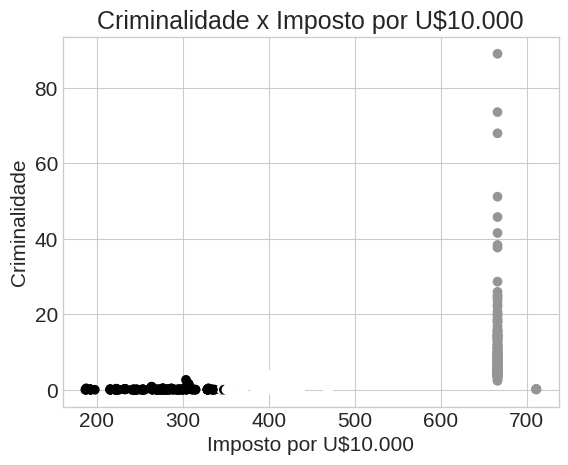

In [61]:
# Plota os clusters
plt.scatter(df['imposto'], df['crim'],c=labels)
plt.xlabel('Imposto por U$10.000')
plt.ylabel('Criminalidade')
plt.title('Criminalidade x Imposto por U$10.000')
plt.show()

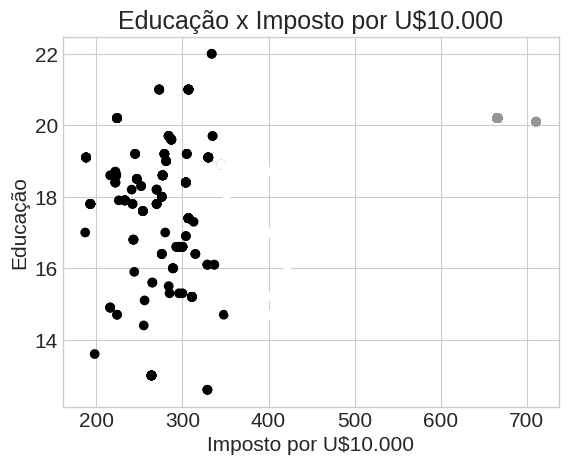

In [62]:
# Plota os clusters
plt.scatter(df['imposto'], df['educacao'], c=labels)
plt.xlabel('Imposto por U$10.000')
plt.ylabel('Educação')
plt.title('Educação x Imposto por U$10.000')
plt.show()

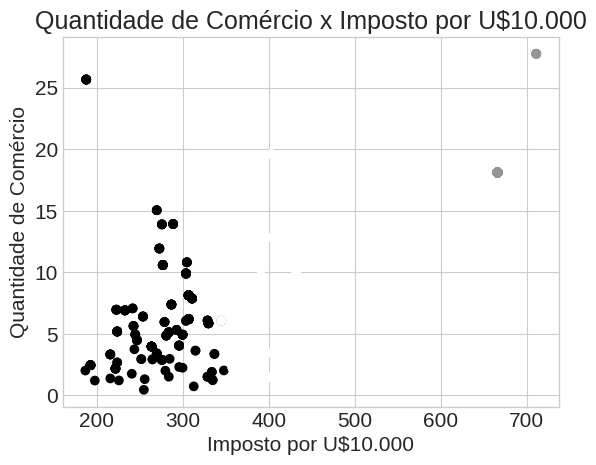

In [63]:
# Plota os clusters
plt.scatter(df['imposto'], df['comercio'], c=labels)
plt.xlabel('Imposto por U$10.000')
plt.ylabel('Quantidade de Comércio')
plt.title('Quantidade de Comércio x Imposto por U$10.000')
plt.show()

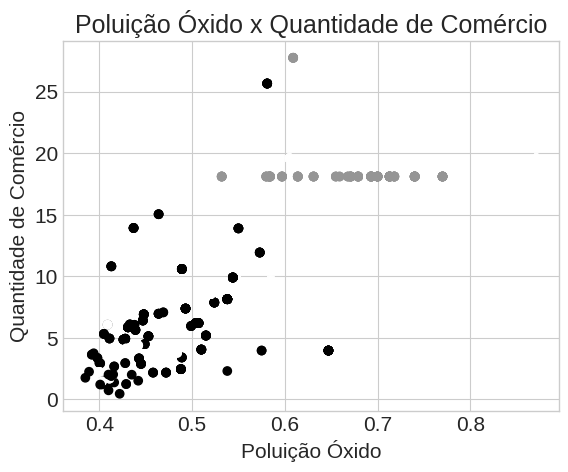

In [64]:
# Plota os clusters
plt.scatter(df['oxido'], df['comercio'], c=labels)
plt.xlabel('Poluição Óxido')
plt.ylabel('Quantidade de Comércio')
plt.title('Poluição Óxido x Quantidade de Comércio')
plt.show()

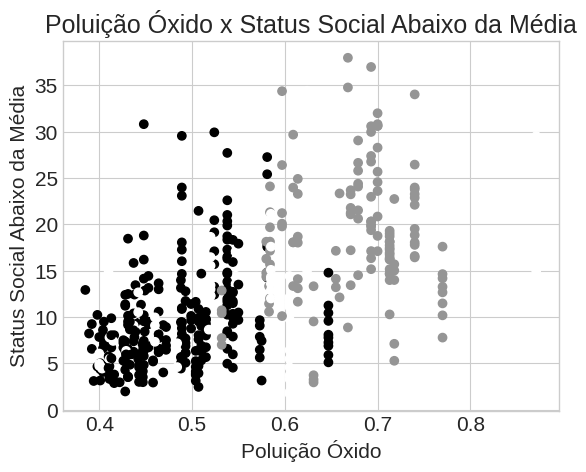

In [65]:
# Plota os clusters
plt.scatter(df['oxido'], df['status'], c=labels)
plt.xlabel('Poluição Óxido')
plt.ylabel('Status Social Abaixo da Média')
plt.title('Poluição Óxido x Status Social Abaixo da Média')
plt.show()

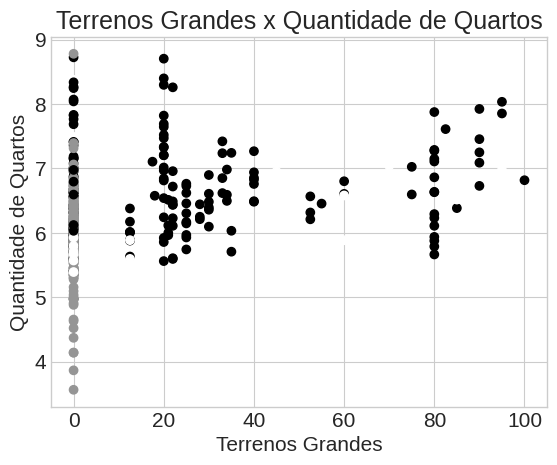

In [66]:
# Plota os clusters
plt.scatter(df['terrenos'], df['quartos'], c=labels)
plt.xlabel('Terrenos Grandes')
plt.ylabel('Quantidade de Quartos')
plt.title('Terrenos Grandes x Quantidade de Quartos')
plt.show()

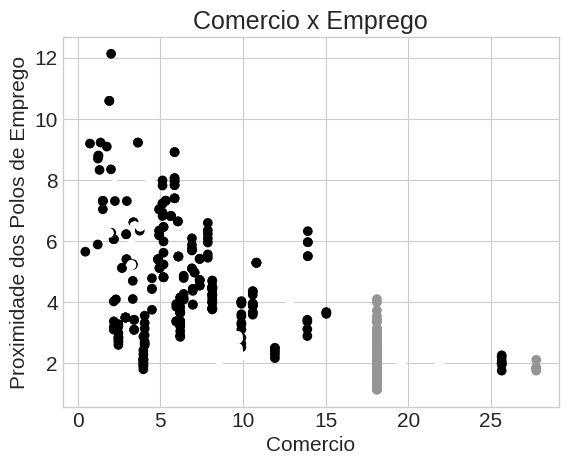

In [67]:
# Plota os clusters
plt.scatter(df['comercio'], df['empregos'], c=labels)
plt.xlabel('Comercio')
plt.ylabel('Proximidade dos Polos de Emprego')
plt.title('Comercio x Emprego')
plt.show()

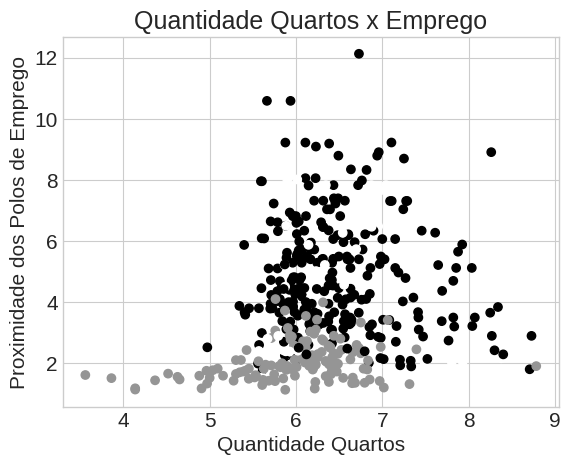

In [68]:
# Plota os clusters
plt.scatter(df['quartos'], df['empregos'], c=labels)
plt.xlabel('Quantidade Quartos')
plt.ylabel('Proximidade dos Polos de Emprego')
plt.title('Quantidade Quartos x Emprego')
plt.show()

## 2.4 - Redução de dimensionalidade com PCA

O PCA (Principal Component Analysis), Análise de Componentes Principais em portugês é um algoritmo de redução de dimensionalidade que tenta encontrar a melhor representação dos dados em um espaço de menor dimensão.

O objetivo do PCA é identificar padrões nos dados, como variáveis altamente correlacionadas, e transformar esses padrões em um conjunto menor de variáveis chamadas de "componentes principais".

Em termos simples, o PCA encontra uma nova base de dados que é uma combinação linear das variáveis originais, de tal forma que a primeira componente principal captura a maior quantidade possível de variação dos dados, a segunda componente principal captura a maior quantidade possível de variação restante e assim por diante. Essas componentes são ordenadas de acordo com a quantidade de variação que elas capturam e são ortogonais entre si, o que significa que elas não estão correlacionadas.

Quando aplicamos o PCA a um conjunto de dados, podemos escolher o número de componentes principais que desejamos manter. Isso nos permite reduzir a dimensionalidade do conjunto de dados, eliminando variáveis redundantes ou pouco informativas e, assim, simplificar o modelo sem perder muita informação. Além disso, o PCA pode ajudar a visualizar os padrões nos dados em um espaço de menor dimensão.

``Para que utilizar o PCA?``

Imagine uma base de dados com 20M de Linhas e 500 colunas. Para treinar um algoritmo de machine learning para fazer previsões será necessário um poder computacional elevado e talvez algumas horas...

Então entra o PCA, quem sabe reduzir as 500 colunas para 20? desta forma seriam 20M de linhas e 20 colunas. ainda iríamos precisar de um tempo para treinar o modelo, mas certamente levaria menos tempo.

No exemplo abaixo, aplicamos o PCA à base de dados casas_boston e reduzimos o número de dimensões de 12 para 2.

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


df = pd.read_csv('casas_boston.csv')
df.head()

X = df[df.columns[:-1]]
y = df[[df.columns[-1]]]

# Normaliza os dados das features com StandardScale
scaler_features = StandardScaler()
X = scaler_features.fit_transform(X)

# Normaliza os dados do alvo com StandardScale
scaler_target = StandardScaler()
y = scaler_target.fit_transform(y)

# Define uma instância do PCA para reduziar a dimensionalidade para 2 colunas
pca = PCA(n_components=2)
# Aplica os dados de X no pca e retorna uma lista com duas listas (Uma para cada coluna nova)
df_pca = pca.fit_transform(X)

# Cria um dataframe do PCA
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca = pd.concat([df_pca, pd.DataFrame(y, columns=['target'])], axis=1)

X_pca = df_pca[df_pca.columns[:-1]]
# Exibe o dataframe do PCA
df_pca

,PC1,PC2,target
0,-2.049189,0.862277,0.159686
1,-1.387326,0.434244,-0.101524
2,-2.031576,0.637750,1.324247
3,-2.577642,-0.006490,1.182758
4,-2.416088,0.094898,1.487503
...,...,...,...
501,-0.228100,0.475160,-0.014454
502,-0.004913,0.412618,-0.210362
503,-0.212860,0.975404,0.148802
504,-0.177729,0.834197,-0.057989


Vamos comparar os resultados da base real com a base do PCA.

In [70]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split

def return_compiled_model(X_train):
    # Criamos uma instância do modelo de rede neural
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # compila o modelo
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# Dividir o conjunto de dados em dados de treinamento e teste, com 20% para teste
X_normal_train, X_normal_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Dividir o conjunto de dados em dados de treinamento e teste, com 20% para teste
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=73)



# Define o modelo para os dados normais
model_normal = return_compiled_model(X_normal_train)

# Define o modelo para os dados do PCA
model_pca = return_compiled_model(X_pca_train)



# treina o modelo com os dados normais
model_normal.fit(X_normal_train, y_train, epochs=200, batch_size=10, verbose = 0)

# treina o modelo com os dados do PCA
model_pca.fit(X_pca_train, y_train, epochs=200, batch_size=10, verbose = 0)



# Faz o predict com o modelo normal
predict_normal = model_normal.predict(X_normal_test)

# Faz o predict com o modelo normal
predict_pca = model_pca.predict(X_pca_test)


# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scaler_target.inverse_transform(y_test)
# Desnormaliza o predict na variável predict_desnormalizado
predict_normal = scaler_target.inverse_transform(predict_normal)
# Desnormaliza o predict na variável predict_desnormalizado
predict_pca = scaler_target.inverse_transform(predict_pca)

# Calcula o mse com a biblioteca do sklearn
mse_normal = mean_squared_error(y_test_desnormalizado, predict_normal)
print("Mean squared error Normal: ", mse_normal)

mse_pca = mean_squared_error(y_test_desnormalizado, predict_pca)
print("Mean squared error PCA: ", mse_pca)

4/4 [==============================] - 0s 4ms/step
Mean squared error Normal:  12130834.766778816
Mean squared error PCA:  16009133.83504905


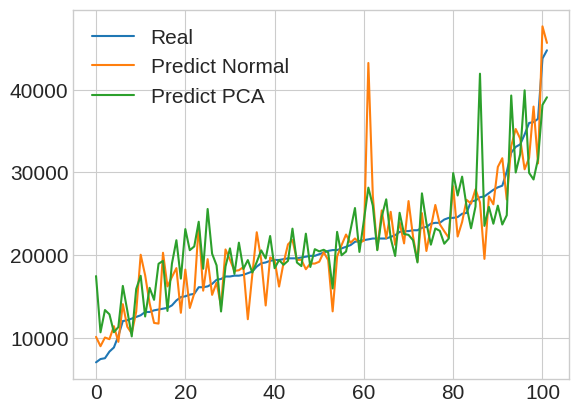

In [71]:
# Cria um dataframe para ordenar os valores
df_grafico_predict = pd.DataFrame()

# Acrescenta o valor de y_test_desnormalizado na coluna real
df_grafico_predict['real'] = y_test_desnormalizado.flatten()

# Acrescenta o valor de predict_desnormalizado na coluna predict
df_grafico_predict['predict_normal'] = predict_normal.flatten()

# Acrescenta o valor de predict_desnormalizado na coluna predict
df_grafico_predict['predict_pca'] = predict_pca.flatten()

# Ordena os dados pela coluna real de forma crescente
df_grafico_predict.sort_values(by='real', inplace = True)

plt.plot(range(0,len(y_test_desnormalizado)), df_grafico_predict['real'], label = 'Real')
plt.plot(range(0,len(predict_desnormalizado)), df_grafico_predict['predict_normal'], label = 'Predict Normal')
plt.plot(range(0,len(predict_desnormalizado)), df_grafico_predict['predict_pca'], label = 'Predict PCA')
plt.legend()
plt.show()